<a href="https://colab.research.google.com/github/kadilrahman/Flight-Prediction-/blob/master/flight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Prediction
Below I have performed flight prediction using data provided by kaggle https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction

## Data Loading

In [ ]:
import pandas as pd #its a data analysis and data manipulation tool
import numpy as np  #library for handling large, multidimentional array and matrices
import matplotlib.pyplot as plt # creates static, animated visualization
import seaborn as sns # high level data visualisation library
from sklearn.model_selection import train_test_split #ML library models,split,data processing, evalutate etc
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
!gdown 1DEEW1iPg-IDF_saz7oK-Gg-tju5SqHN8

Downloading...
From: https://drive.google.com/uc?id=1DEEW1iPg-IDF_saz7oK-Gg-tju5SqHN8
To: /content/flight.zip
100% 617k/617k [00:00<00:00, 29.2MB/s]


In [ ]:
!unzip flight.zip

Archive:  flight.zip
  inflating: Data_Train.xlsx         
  inflating: __MACOSX/._Data_Train.xlsx  
  inflating: Test_set.xlsx           
  inflating: __MACOSX/._Test_set.xlsx  


In [ ]:
train_data = pd.read_excel('/content/Data_Train.xlsx')
test_data = pd.read_excel('/content/Test_set.xlsx')


## Data cleaning

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
train_data['Additional_Info'].info()



<class 'pandas.core.series.Series'>
RangeIndex: 10683 entries, 0 to 10682
Series name: Additional_Info
Non-Null Count  Dtype 
--------------  ----- 
10683 non-null  object
dtypes: object(1)
memory usage: 83.6+ KB


In [ ]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

Route          1
Total_Stops    1
dtype: int64


In [ ]:
# Remove rows with missing values
data_cleaned = train_data.dropna()


In [ ]:
# Recheck for missing values
missing_values_cleaned = data_cleaned.isnull().sum()
print(missing_values_cleaned[missing_values_cleaned > 0])


Series([], dtype: int64)


In [ ]:
# Remove 'Route' and 'Additional_Info' columns
data_cleaned = train_data.drop(columns=['Route', 'Additional_Info'])

In [ ]:
data_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [ ]:
# Convert to consistent case (e.g., all to uppercase)
data_cleaned['Airline'] = data_cleaned['Airline'].str.upper()
data_cleaned['Source'] = data_cleaned['Source'].str.upper()
data_cleaned['Destination'] = data_cleaned['Destination'].str.upper()

# Check for unique values to spot any typos or inconsistencies
print(data_cleaned['Airline'].unique())
print(data_cleaned['Source'].unique())
print(data_cleaned['Destination'].unique())


['INDIGO' 'AIR INDIA' 'JET AIRWAYS' 'SPICEJET' 'MULTIPLE CARRIERS' 'GOAIR'
 'VISTARA' 'AIR ASIA' 'VISTARA PREMIUM ECONOMY' 'JET AIRWAYS BUSINESS'
 'MULTIPLE CARRIERS PREMIUM ECONOMY' 'TRUJET']
['BANGLORE' 'KOLKATA' 'DELHI' 'CHENNAI' 'MUMBAI']
['NEW DELHI' 'BANGLORE' 'COCHIN' 'KOLKATA' 'DELHI' 'HYDERABAD']


In [ ]:
# Loop through each column and print the count of unique values
for column in data_cleaned.columns:
    print(f"Unique value counts for {column}:")
    print(data_cleaned[column].value_counts())
    print("\n")


Unique value counts for Airline:
JET AIRWAYS                          3849
INDIGO                               2053
AIR INDIA                            1752
MULTIPLE CARRIERS                    1196
SPICEJET                              818
VISTARA                               479
AIR ASIA                              319
GOAIR                                 194
MULTIPLE CARRIERS PREMIUM ECONOMY      13
JET AIRWAYS BUSINESS                    6
VISTARA PREMIUM ECONOMY                 3
TRUJET                                  1
Name: Airline, dtype: int64


Unique value counts for Date_of_Journey:
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     

In [ ]:
# Example for the 'Airline' column
airline_counts = data_cleaned['Airline'].value_counts()
threshold = 15  # This is an example threshold

data_cleaned['Airline'] = data_cleaned['Airline'].apply(lambda x: x if airline_counts[x] > threshold else 'OTHER')


In [ ]:
data_cleaned['Airline'].unique()

array(['INDIGO', 'AIR INDIA', 'JET AIRWAYS', 'SPICEJET',
       'MULTIPLE CARRIERS', 'GOAIR', 'VISTARA', 'AIR ASIA', 'OTHER'],
      dtype=object)

In [ ]:
print(data_cleaned.head())

       Airline Date_of_Journey    Source Destination Dep_Time  Arrival_Time  \
0       INDIGO      24/03/2019  BANGLORE   NEW DELHI    22:20  01:10 22 Mar   
1    AIR INDIA       1/05/2019   KOLKATA    BANGLORE    05:50         13:15   
2  JET AIRWAYS       9/06/2019     DELHI      COCHIN    09:25  04:25 10 Jun   
3       INDIGO      12/05/2019   KOLKATA    BANGLORE    18:05         23:30   
4       INDIGO      01/03/2019  BANGLORE   NEW DELHI    16:50         21:35   

  Duration Total_Stops  Price  
0   2h 50m    non-stop   3897  
1   7h 25m     2 stops   7662  
2      19h     2 stops  13882  
3   5h 25m      1 stop   6218  
4   4h 45m      1 stop  13302  


In [ ]:
data_cleaned['Date_of_Journey'].unique

<bound method Series.unique of 0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object>

## Data Pre-processing

In [ ]:
#checking if there are mutliple year date
data_cleaned['Date_of_Journey'] = pd.to_datetime(data_cleaned['Date_of_Journey'], format='%d/%m/%Y')

# Extract the year and count unique values
unique_years = data_cleaned['Date_of_Journey'].dt.year.nunique()
print(unique_years)

1


In [ ]:
data_cleaned['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

In [ ]:
data_cleaned['Day_of_Journey'] = data_cleaned['Date_of_Journey'].dt.day
data_cleaned['Month_of_Journey'] = data_cleaned['Date_of_Journey'].dt.month
data_cleaned['Weekday_of_Journey'] = data_cleaned['Date_of_Journey'].dt.weekday

In [ ]:
data_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey
0,INDIGO,2019-03-24,BANGLORE,NEW DELHI,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,6
1,AIR INDIA,2019-05-01,KOLKATA,BANGLORE,05:50,13:15,7h 25m,2 stops,7662,1,5,2
2,JET AIRWAYS,2019-06-09,DELHI,COCHIN,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,6
3,INDIGO,2019-05-12,KOLKATA,BANGLORE,18:05,23:30,5h 25m,1 stop,6218,12,5,6
4,INDIGO,2019-03-01,BANGLORE,NEW DELHI,16:50,21:35,4h 45m,1 stop,13302,1,3,4


In [ ]:
def convert_duration(duration):
    parts = duration.split(' ')
    hours = int(parts[0].replace('h', '')) if 'h' in parts[0] else 0
    minutes = int(parts[1].replace('m', '')) if len(parts) > 1 else 0
    return hours * 60 + minutes

data_cleaned['Duration'] = data_cleaned['Duration'].apply(convert_duration)


In [ ]:
data_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey
0,INDIGO,2019-03-24,BANGLORE,NEW DELHI,22:20,01:10 22 Mar,170,non-stop,3897,24,3,6
1,AIR INDIA,2019-05-01,KOLKATA,BANGLORE,05:50,13:15,445,2 stops,7662,1,5,2
2,JET AIRWAYS,2019-06-09,DELHI,COCHIN,09:25,04:25 10 Jun,1140,2 stops,13882,9,6,6
3,INDIGO,2019-05-12,KOLKATA,BANGLORE,18:05,23:30,325,1 stop,6218,12,5,6
4,INDIGO,2019-03-01,BANGLORE,NEW DELHI,16:50,21:35,285,1 stop,13302,1,3,4


In [ ]:
data_cleaned['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [ ]:
data_cleaned['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [ ]:
# Split the 'Arrival_Time' into 'Arrival_Time' and 'Arrival_Date'
data_cleaned[['Arrival_NTime', 'Arrival_Date']] = data_cleaned['Arrival_Time'].str.split(' ', 1, expand=True)

# Fill NaN in 'Arrival_Date' with the corresponding 'Date_of_Journey'
data_cleaned['Arrival_Date'] = data_cleaned['Arrival_Date'].fillna(data_cleaned['Date_of_Journey'])

<ipython-input-28-63829f677627>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data_cleaned[['Arrival_NTime', 'Arrival_Date']] = data_cleaned['Arrival_Time'].str.split(' ', 1, expand=True)


In [ ]:
data_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Arrival_NTime,Arrival_Date
0,INDIGO,2019-03-24,BANGLORE,NEW DELHI,22:20,01:10 22 Mar,170,non-stop,3897,24,3,6,01:10,22 Mar
1,AIR INDIA,2019-05-01,KOLKATA,BANGLORE,05:50,13:15,445,2 stops,7662,1,5,2,13:15,2019-05-01 00:00:00
2,JET AIRWAYS,2019-06-09,DELHI,COCHIN,09:25,04:25 10 Jun,1140,2 stops,13882,9,6,6,04:25,10 Jun
3,INDIGO,2019-05-12,KOLKATA,BANGLORE,18:05,23:30,325,1 stop,6218,12,5,6,23:30,2019-05-12 00:00:00
4,INDIGO,2019-03-01,BANGLORE,NEW DELHI,16:50,21:35,285,1 stop,13302,1,3,4,21:35,2019-03-01 00:00:00


In [ ]:
# Convert 'Arrival_Date' to datetime
# Assuming 'Arrival_Date' is in the format 'dd MMM' (e.g., '22 Mar')
data_cleaned['Arrival_Date'] = pd.to_datetime(data_cleaned['Arrival_Date'], format='%d %b', errors='coerce')

# Handle cases where 'Arrival_Date' is NaT (Not a Time) by assuming it's the same as 'Date_of_Journey'
data_cleaned['Arrival_Date'] = data_cleaned['Arrival_Date'].fillna(data_cleaned['Date_of_Journey'])

In [ ]:
data_cleaned['Arrival_Date'] = data_cleaned['Arrival_Date'].apply(lambda x: x.replace(year=data_cleaned['Date_of_Journey'].dt.year.iloc[0]))


In [ ]:
data_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Arrival_NTime,Arrival_Date
0,INDIGO,2019-03-24,BANGLORE,NEW DELHI,22:20,01:10 22 Mar,170,non-stop,3897,24,3,6,01:10,2019-03-22
1,AIR INDIA,2019-05-01,KOLKATA,BANGLORE,05:50,13:15,445,2 stops,7662,1,5,2,13:15,2019-05-01
2,JET AIRWAYS,2019-06-09,DELHI,COCHIN,09:25,04:25 10 Jun,1140,2 stops,13882,9,6,6,04:25,2019-06-10
3,INDIGO,2019-05-12,KOLKATA,BANGLORE,18:05,23:30,325,1 stop,6218,12,5,6,23:30,2019-05-12
4,INDIGO,2019-03-01,BANGLORE,NEW DELHI,16:50,21:35,285,1 stop,13302,1,3,4,21:35,2019-03-01


In [ ]:
data_cleaned.tail()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Arrival_NTime,Arrival_Date
10678,AIR ASIA,2019-04-09,KOLKATA,BANGLORE,19:55,22:25,150,non-stop,4107,9,4,1,22:25,2019-04-09
10679,AIR INDIA,2019-04-27,KOLKATA,BANGLORE,20:45,23:20,155,non-stop,4145,27,4,5,23:20,2019-04-27
10680,JET AIRWAYS,2019-04-27,BANGLORE,DELHI,08:20,11:20,180,non-stop,7229,27,4,5,11:20,2019-04-27
10681,VISTARA,2019-03-01,BANGLORE,NEW DELHI,11:30,14:10,160,non-stop,12648,1,3,4,14:10,2019-03-01
10682,AIR INDIA,2019-05-09,DELHI,COCHIN,10:55,19:15,500,2 stops,11753,9,5,3,19:15,2019-05-09


In [ ]:
data_cleaned['Total_Stops'] = data_cleaned['Total_Stops'].replace('non-stop', 0).apply(lambda x: int(x.split(' ')[0]) if type(x) == str else x)


In [ ]:
data_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Arrival_NTime,Arrival_Date
0,INDIGO,2019-03-24,BANGLORE,NEW DELHI,22:20,01:10 22 Mar,170,0.0,3897,24,3,6,01:10,2019-03-22
1,AIR INDIA,2019-05-01,KOLKATA,BANGLORE,05:50,13:15,445,2.0,7662,1,5,2,13:15,2019-05-01
2,JET AIRWAYS,2019-06-09,DELHI,COCHIN,09:25,04:25 10 Jun,1140,2.0,13882,9,6,6,04:25,2019-06-10
3,INDIGO,2019-05-12,KOLKATA,BANGLORE,18:05,23:30,325,1.0,6218,12,5,6,23:30,2019-05-12
4,INDIGO,2019-03-01,BANGLORE,NEW DELHI,16:50,21:35,285,1.0,13302,1,3,4,21:35,2019-03-01


In [ ]:
# Assuming 'Arrival_Date' is a datetime column in your DataFrame 'data_cleaned'
data_cleaned['Day_of_Arrival'] = data_cleaned['Arrival_Date'].dt.day
data_cleaned['Month_of_Arrival'] = data_cleaned['Arrival_Date'].dt.month
data_cleaned['Weekday_of_Arrival'] = data_cleaned['Arrival_Date'].dt.weekday

In [ ]:
data_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Arrival_NTime,Arrival_Date,Day_of_Arrival,Month_of_Arrival,Weekday_of_Arrival
0,INDIGO,2019-03-24,BANGLORE,NEW DELHI,22:20,01:10 22 Mar,170,0.0,3897,24,3,6,01:10,2019-03-22,22,3,4
1,AIR INDIA,2019-05-01,KOLKATA,BANGLORE,05:50,13:15,445,2.0,7662,1,5,2,13:15,2019-05-01,1,5,2
2,JET AIRWAYS,2019-06-09,DELHI,COCHIN,09:25,04:25 10 Jun,1140,2.0,13882,9,6,6,04:25,2019-06-10,10,6,0
3,INDIGO,2019-05-12,KOLKATA,BANGLORE,18:05,23:30,325,1.0,6218,12,5,6,23:30,2019-05-12,12,5,6
4,INDIGO,2019-03-01,BANGLORE,NEW DELHI,16:50,21:35,285,1.0,13302,1,3,4,21:35,2019-03-01,1,3,4


In [ ]:
# Assuming Dep_Time and Arrival_NTime are in the format 'HH:MM'
data_cleaned['Dep_Hour'] = pd.to_datetime(data_cleaned['Dep_Time']).dt.hour
data_cleaned['Dep_Minute'] = pd.to_datetime(data_cleaned['Dep_Time']).dt.minute

data_cleaned['Arrival_Hour'] = pd.to_datetime(data_cleaned['Arrival_NTime']).dt.hour
data_cleaned['Arrival_Minute'] = pd.to_datetime(data_cleaned['Arrival_NTime']).dt.minute


In [ ]:
# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

<ipython-input-40-6b1c2514f2df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_cleaned.corr()


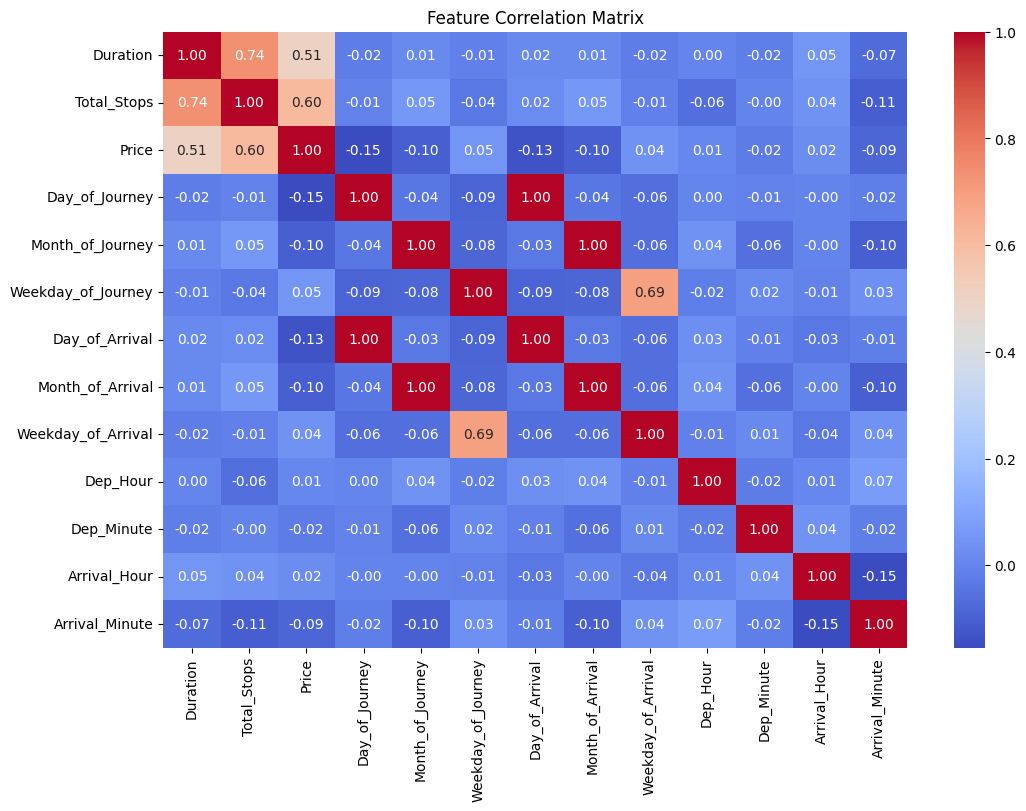

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_cleaned.corr()

# Use seaborn to create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

<ipython-input-41-33c84b9e1aa6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  selected_corr_matrix = data_cleaned[selected_features].corr()


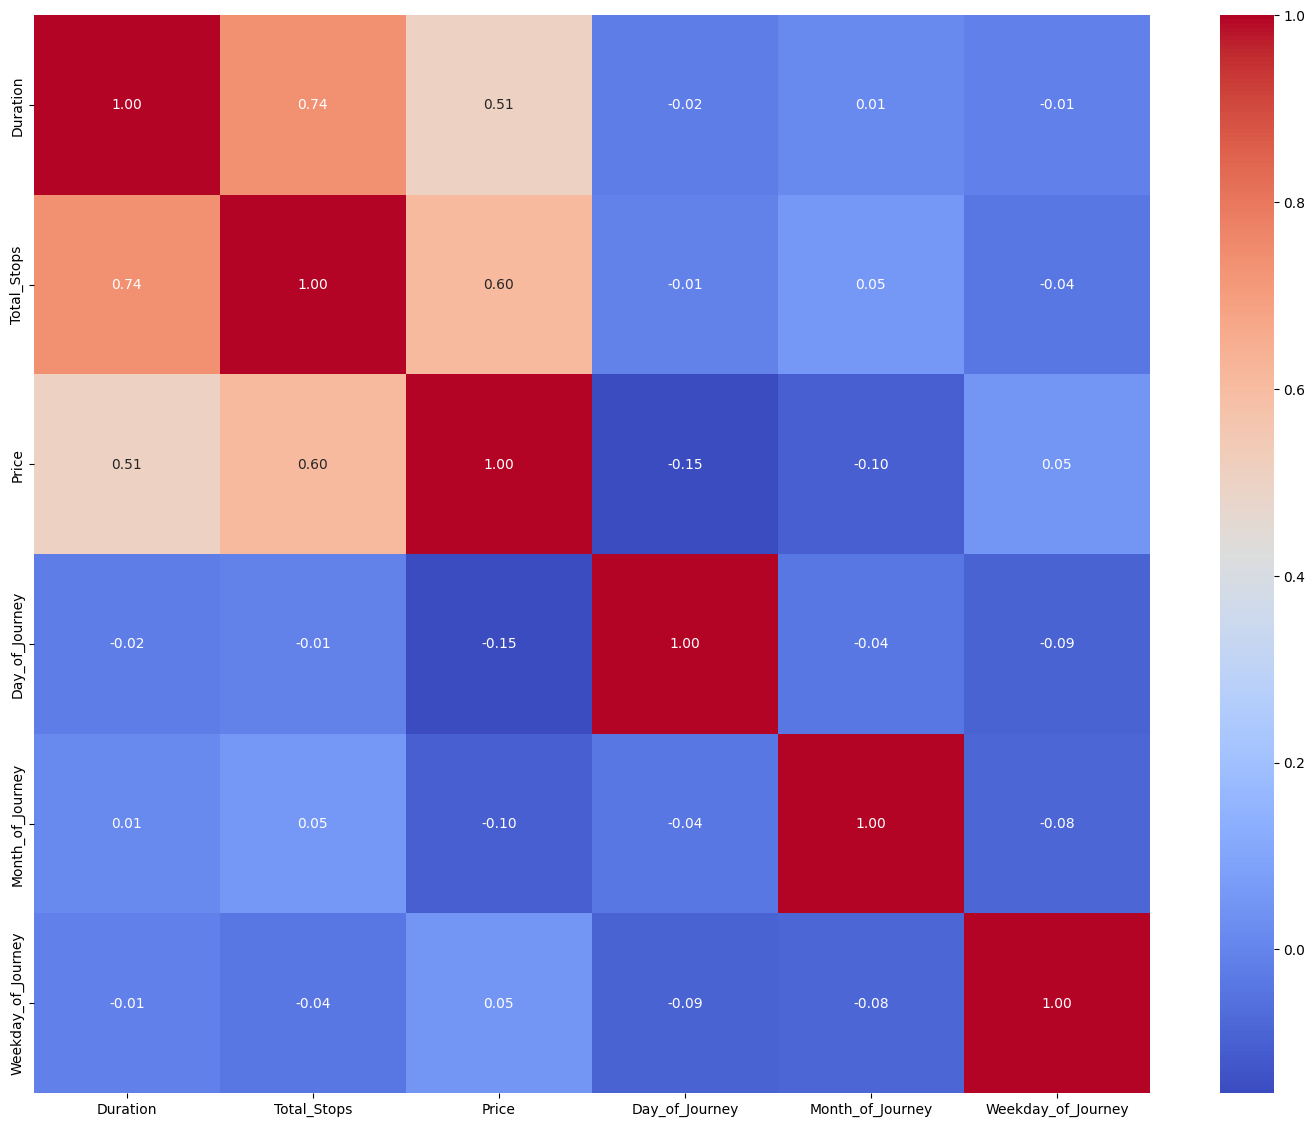

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features you're interested in
selected_features = ['Duration', 'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey', 'Weekday_of_Journey', 'Arrival_NTime', 'Arrival_Date', 'Source', 'Destination']

# Calculate the correlation matrix for the selected features
selected_corr_matrix = data_cleaned[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(selected_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [ ]:
# One-hot encode the categorical variables
data_encoded = pd.get_dummies(data_cleaned, columns=['Airline', 'Source', 'Destination'])

In [ ]:
data_encoded.columns

Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Weekday_of_Journey', 'Arrival_NTime', 'Arrival_Date', 'Day_of_Arrival',
       'Month_of_Arrival', 'Weekday_of_Arrival', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Airline_AIR ASIA',
       'Airline_AIR INDIA', 'Airline_GOAIR', 'Airline_INDIGO',
       'Airline_JET AIRWAYS', 'Airline_MULTIPLE CARRIERS', 'Airline_OTHER',
       'Airline_SPICEJET', 'Airline_VISTARA', 'Source_BANGLORE',
       'Source_CHENNAI', 'Source_DELHI', 'Source_KOLKATA', 'Source_MUMBAI',
       'Destination_BANGLORE', 'Destination_COCHIN', 'Destination_DELHI',
       'Destination_HYDERABAD', 'Destination_KOLKATA',
       'Destination_NEW DELHI'],
      dtype='object')

In [ ]:
original_columns_to_drop = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Arrival_Time', 'Dep_Time', 'Arrival_NTime', 'Arrival_Date']
data_encoded.drop(columns=original_columns_to_drop, inplace=True, errors='ignore')
data_encoded.head()

,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Day_of_Arrival,Month_of_Arrival,Weekday_of_Arrival,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_AIR ASIA,Airline_AIR INDIA,Airline_GOAIR,Airline_INDIGO,Airline_JET AIRWAYS,Airline_MULTIPLE CARRIERS,Airline_OTHER,Airline_SPICEJET,Airline_VISTARA,Source_BANGLORE,Source_CHENNAI,Source_DELHI,Source_KOLKATA,Source_MUMBAI,Destination_BANGLORE,Destination_COCHIN,Destination_DELHI,Destination_HYDERABAD,Destination_KOLKATA,Destination_NEW DELHI
0,170,0.0,3897,24,3,6,22,3,4,22,20,1,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,445,2.0,7662,1,5,2,1,5,2,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1140,2.0,13882,9,6,6,10,6,0,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,325,1.0,6218,12,5,6,12,5,6,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,285,1.0,13302,1,3,4,1,3,4,16,50,21,35,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


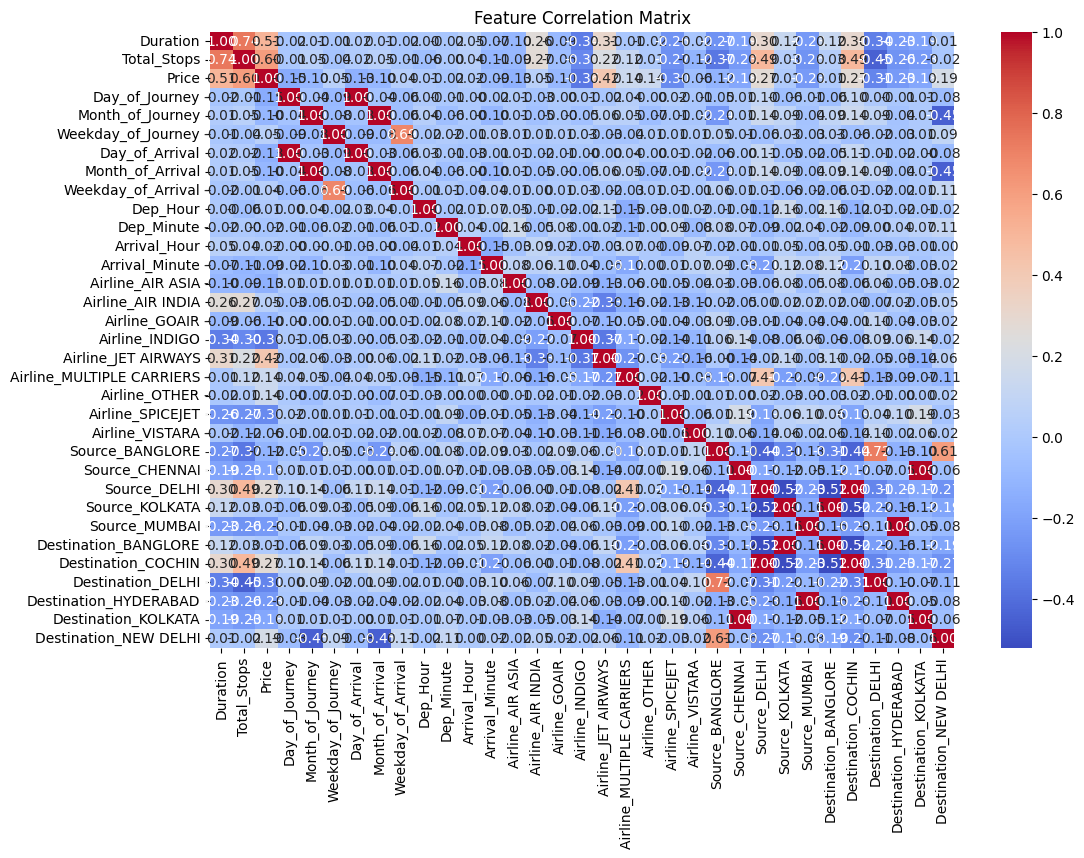

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Use seaborn to create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
data_encoded.head()

,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Day_of_Arrival,Month_of_Arrival,Weekday_of_Arrival,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_AIR ASIA,Airline_AIR INDIA,Airline_GOAIR,Airline_INDIGO,Airline_JET AIRWAYS,Airline_MULTIPLE CARRIERS,Airline_OTHER,Airline_SPICEJET,Airline_VISTARA,Source_BANGLORE,Source_CHENNAI,Source_DELHI,Source_KOLKATA,Source_MUMBAI,Destination_BANGLORE,Destination_COCHIN,Destination_DELHI,Destination_HYDERABAD,Destination_KOLKATA,Destination_NEW DELHI
0,170,0.0,3897,24,3,6,22,3,4,22,20,1,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,445,2.0,7662,1,5,2,1,5,2,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1140,2.0,13882,9,6,6,10,6,0,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,325,1.0,6218,12,5,6,12,5,6,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,285,1.0,13302,1,3,4,1,3,4,16,50,21,35,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Check for NaN in each column
nan_in_columns = data_encoded.isna().sum()
print(nan_in_columns)


Duration                     0
Total_Stops                  1
Price                        0
Day_of_Journey               0
Month_of_Journey             0
Weekday_of_Journey           0
Day_of_Arrival               0
Month_of_Arrival             0
Weekday_of_Arrival           0
Dep_Hour                     0
Dep_Minute                   0
Arrival_Hour                 0
Arrival_Minute               0
Airline_AIR ASIA             0
Airline_AIR INDIA            0
Airline_GOAIR                0
Airline_INDIGO               0
Airline_JET AIRWAYS          0
Airline_MULTIPLE CARRIERS    0
Airline_OTHER                0
Airline_SPICEJET             0
Airline_VISTARA              0
Source_BANGLORE              0
Source_CHENNAI               0
Source_DELHI                 0
Source_KOLKATA               0
Source_MUMBAI                0
Destination_BANGLORE         0
Destination_COCHIN           0
Destination_DELHI            0
Destination_HYDERABAD        0
Destination_KOLKATA          0
Destinat

In [ ]:
# Drop rows where 'Total_Stops' is NaN
data_encoded_cleaned = data_encoded.dropna(subset=['Total_Stops'])

# Check the result
print(data_encoded_cleaned.isna().sum())


Duration                     0
Total_Stops                  0
Price                        0
Day_of_Journey               0
Month_of_Journey             0
Weekday_of_Journey           0
Day_of_Arrival               0
Month_of_Arrival             0
Weekday_of_Arrival           0
Dep_Hour                     0
Dep_Minute                   0
Arrival_Hour                 0
Arrival_Minute               0
Airline_AIR ASIA             0
Airline_AIR INDIA            0
Airline_GOAIR                0
Airline_INDIGO               0
Airline_JET AIRWAYS          0
Airline_MULTIPLE CARRIERS    0
Airline_OTHER                0
Airline_SPICEJET             0
Airline_VISTARA              0
Source_BANGLORE              0
Source_CHENNAI               0
Source_DELHI                 0
Source_KOLKATA               0
Source_MUMBAI                0
Destination_BANGLORE         0
Destination_COCHIN           0
Destination_DELHI            0
Destination_HYDERABAD        0
Destination_KOLKATA          0
Destinat

In [ ]:
feature  = data_encoded_cleaned.drop(columns='Price', axis=1)
label = data_encoded_cleaned['Price']

In [ ]:
feature


,Duration,Total_Stops,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Day_of_Arrival,Month_of_Arrival,Weekday_of_Arrival,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_AIR ASIA,Airline_AIR INDIA,Airline_GOAIR,Airline_INDIGO,Airline_JET AIRWAYS,Airline_MULTIPLE CARRIERS,Airline_OTHER,Airline_SPICEJET,Airline_VISTARA,Source_BANGLORE,Source_CHENNAI,Source_DELHI,Source_KOLKATA,Source_MUMBAI,Destination_BANGLORE,Destination_COCHIN,Destination_DELHI,Destination_HYDERABAD,Destination_KOLKATA,Destination_NEW DELHI
0,170,0.0,24,3,6,22,3,4,22,20,1,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,445,2.0,1,5,2,1,5,2,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1140,2.0,9,6,6,10,6,0,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,325,1.0,12,5,6,12,5,6,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,285,1.0,1,3,4,1,3,4,16,50,21,35,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0.0,9,4,1,9,4,1,19,55,22,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,155,0.0,27,4,5,27,4,5,20,45,23,20,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,180,0.0,27,4,5,27,4,5,8,20,11,20,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,160,0.0,1,3,4,1,3,4,11,30,14,10,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


## Data training and test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X and y are already defined (features and target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

# Create the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)




In [ ]:


# Train the model
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:

# Make predictions
predictions = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 3955522.1253314074
Root Mean Squared Error: 1988.8494476283033


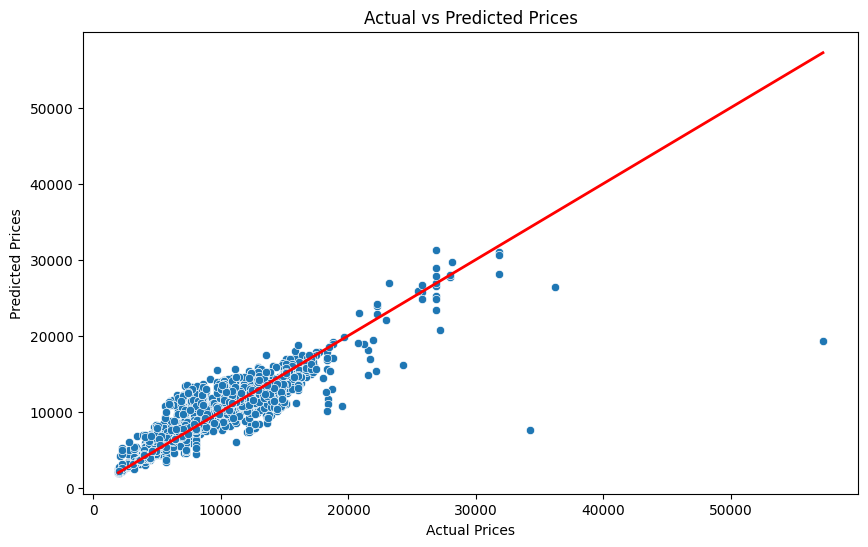

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'predictions' is your model's predicted prices and 'y_test' is the actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.show()
